***SHEET 4***


CARLOS FAROUK ABDALÁ RINCÓN

TOMAS CANDEO MONTOYA

GABRIEL DAVID JIMÉNEZ MOSQUERA

In [132]:
#IMPORTS
import numpy as np
import random
import math
#import pandas as pd
import matplotlib.pyplot as plt
#import requests as rq
#from itertools import combinations

### EXERCISE 1

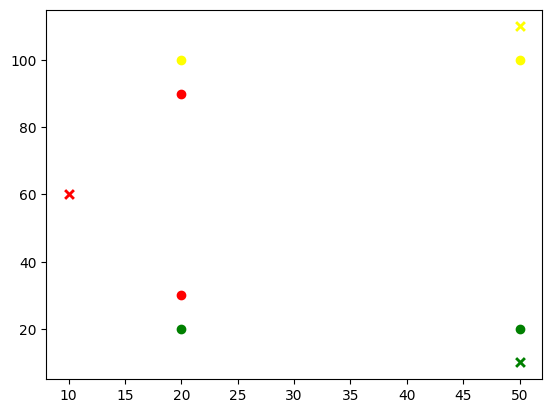

El Cluster ' red ' no tiene valores, por lo que su centroide no variara


C:\Users\Carlos Abdala\AppData\Local\Temp\ipykernel_6244\2198233222.py:31: RuntimeWarning: Mean of empty slice
  cluster_mean = np.nanmean(cluster_array, axis=0)


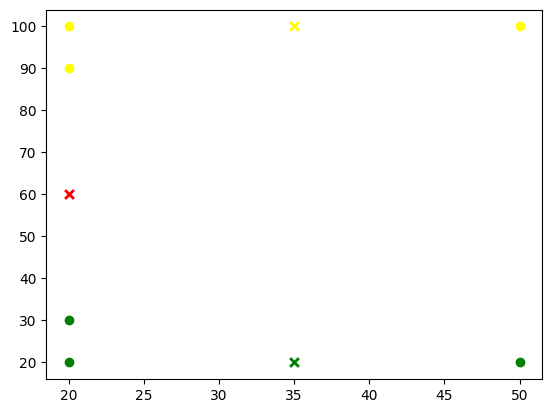

El Cluster ' red ' no tiene valores, por lo que su centroide no variara


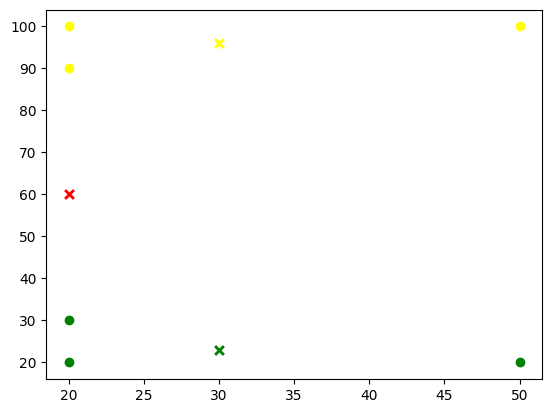

In [227]:
D_simulated=np.array([[20,20],
                     [50,20],
                     [20,30],
                     [20,90],
                     [20,100],
                     [50,100]])
mu_simulated=np.array([[10,60],
                      [50,10],
                      [50,110]])

e_calculated=0.02+1
mu_previows= [[0,0]for _ in range(len(mu_simulated))]
colors=["red","green", "yellow"]
while(e_calculated>0.02):
    final_C=[]
    e_guide=0
    clusters = [[]for _ in range(len(mu_simulated))]
    plt.plot()
    for _, point in enumerate(D_simulated): 
        difference_in_point=[]

        for index, centroid in enumerate(mu_simulated):
            plt.scatter(centroid[0],centroid[1],color=colors[index],marker='x')
            difference_in_point.append(math.sqrt(np.linalg.norm(point - centroid)))
        nearest_index=np.argmin(difference_in_point)
        clusters[nearest_index].append(point)
        final_C.append(nearest_index)

    for index, cluster in enumerate(clusters):
        cluster_array = np.array(cluster)
        cluster_mean = np.nanmean(cluster_array, axis=0)
        if (not np.isnan(cluster_mean).any()):
            mu_simulated[index] = cluster_mean
            for _, point in enumerate(cluster):
                plt.scatter(point[0], point[1], color=colors[index])
        else:
            print("El Cluster '",colors[index],"' no tiene valores, por lo que su centroide no variara")

    for index, centroid_group_calculated in enumerate(mu_simulated):
        e_guide=e_guide+math.sqrt(np.linalg.norm(centroid_group_calculated - mu_previows[index]))
        e_calculated=e_guide
    mu_previows=mu_simulated.copy()
    plt.show()



En este sencillo ejemplo se puede ver como haciendo uso de K-means, la actualización de cada Cluster y su centroide generó que en el caso de e grupo de datos rojo, pasara de tener dos datos a no tener ninguno ya que desde la segunda iteración, los puntos que inicialmente pertenecian a este Cluster, pasaron a pertenecer a otros, en este caso los amarillo y verde.

### EXERCISE 2

#### EXERCISE 2.1

In [228]:
def kMeans(D,k,e,mu_given):
    t=0
    if mu_given==None:
        mu=[]
        min_Di = min(D[:, 0])
        max_Di = max(D[:, 0])
        min_Dj = min(D[:, 1])
        max_Dj = max(D[:, 1])
        for _ in range(k):
            centroid_i=random.uniform(min_Di,max_Di)
            centroid_j=random.uniform(min_Dj,max_Dj)
            mu.append([centroid_i,centroid_j])
    elif (len(mu_given)!=k):
        print("El número de centroides dado no coincide con las k's requeridas")
        return (None)
    else:
        mu=mu_given
    
    e_calculated=e+1
    mu_previows= [[0,0]for _ in range(len(mu))]

    while(e_calculated>e):
        final_C=[]
        e_guide=0
        t+=1
        clusters = [[]for _ in range(len(mu))]
        for _, point in enumerate(D): 
            difference_in_point=[]

            for _, centroid in enumerate(mu):
                difference_in_point.append(math.sqrt(np.linalg.norm(point - centroid)))
            nearest_index=np.argmin(difference_in_point)
            clusters[nearest_index].append(point)
            final_C.append(nearest_index)

        for index, cluster in enumerate(clusters):
            cluster_array=np.array(cluster)
            cluster_mean=np.mean(cluster_array,axis=0)
            mu[index]=cluster_mean

        for index, centroid_group_calculated in enumerate(mu):
            e_guide=e_guide+math.sqrt(np.linalg.norm(centroid_group_calculated - mu_previows[index]))
            e_calculated=e_guide
        mu_previows=mu.copy()

        nan_present = any(np.isnan(centroid_for_nan).any() for centroid_for_nan in mu)

        if(nan_present):
            if(mu_given!=None):
                print("Los centroides 'mu' dados generan valores inválidos, por favor pruebe con otros valores")
            else:    
                final_C, mu =kMeans(D,k,e,mu_given)
        else:
            print("La lista de centroides tras la iteración ",t," es: \n", mu)
    
    return (final_C,mu)


In [229]:
D = np.random.randint(0, 10, size=(40, 2))

C,mu_x=kMeans(D,2,0.02,None)

La lista de centroides tras la iteración  1  es: 
 [array([3.57142857, 0.92857143]), array([4.96153846, 7.07692308])]
La lista de centroides tras la iteración  2  es: 
 [array([3.5625, 1.3125]), array([5.08333333, 7.33333333])]
La lista de centroides tras la iteración  3  es: 
 [array([3.5625, 1.3125]), array([5.08333333, 7.33333333])]


#### EXERCISE 2.2

In [ ]:
# DBSCAN
def DBSCAN (D, epsilon, minpts):

    def Density_Connected(x, k):
        for y in Ne(x, D, epsilon):
            if id[y] == 0:
                id[y] = k
                if y in Core_Points:
                    Density_Connected(y, k)
    
    k = 0 # cluster id
    id  = np.array([0]*len(D)) # cluster id
    Core_Points = []
    Noise_Points = []
    Border_Points = []

    for xi in D:
        Neighborhood = Ne(xi, D, epsilon)
        id[xi] = 0
        if len(Neighborhood) >= minpts:
            Core_Points.append(xi)

    for xi in Core_Points:
        if id[xi] == 0:
            k += 1
            id[xi] = k
            Density_Connected(xi, k, D, epsilon, minpts)
    
    Clusters = {i: {xi for xi in D if id[xi] == i} for i in range(1, k+1)}
    Noise_Points = {xi for xi in D if id[xi] == 0}
    Border_Points = {xi for xi in D if xi not in Core_Points and xi not in Noise_Points}
    return Clusters, Core_Points, Noise_Points, Border_Points

 
  

def Ne (xi, D, epsilon):
    Ne = []
    for xj in D:
        if np.linalg.norm(xi-xj) <= epsilon:
            Ne.append(xj)
    return Ne 

X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])

Clusters, Core_Points, Noise_Points, Border_Points = DBSCAN(X, 3, 2)